Tesla Stock Price Financial Analysis

Data Analysis day 1 useing pandas  and matplotlib

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
#import the data
data =pd.read_csv("/content/Netflix_stock_data.csv")

In [40]:
#show the data
data

,Date,Close,High,Low,Open,Volume
0,2002-05-23,1.196429,1.242857,1.145714,1.156429,104790000
1,2002-05-24,1.210000,1.225000,1.197143,1.214286,11104800
2,2002-05-28,1.157143,1.232143,1.157143,1.213571,6609400
3,2002-05-29,1.103571,1.164286,1.085714,1.164286,6757800
4,2002-05-30,1.071429,1.107857,1.071429,1.107857,10154200
...,...,...,...,...,...,...
5805,2025-06-18,1222.290039,1242.000000,1220.500000,1229.989990,2281000
5806,2025-06-20,1231.410034,1248.500000,1224.349976,1234.449951,5348200
5807,2025-06-23,1253.540039,1254.839966,1215.010010,1238.030029,2667300
5808,2025-06-24,1279.109985,1282.569946,1255.000000,1260.550049,2663300


In [41]:
data.set_index('Date')

,Close,High,Low,Open,Volume
Date,,,,,
2002-05-23,1.196429,1.242857,1.145714,1.156429,104790000
2002-05-24,1.210000,1.225000,1.197143,1.214286,11104800
2002-05-28,1.157143,1.232143,1.157143,1.213571,6609400
2002-05-29,1.103571,1.164286,1.085714,1.164286,6757800
2002-05-30,1.071429,1.107857,1.071429,1.107857,10154200
...,...,...,...,...,...
2025-06-18,1222.290039,1242.000000,1220.500000,1229.989990,2281000
2025-06-20,1231.410034,1248.500000,1224.349976,1234.449951,5348200
2025-06-23,1253.540039,1254.839966,1215.010010,1238.030029,2667300


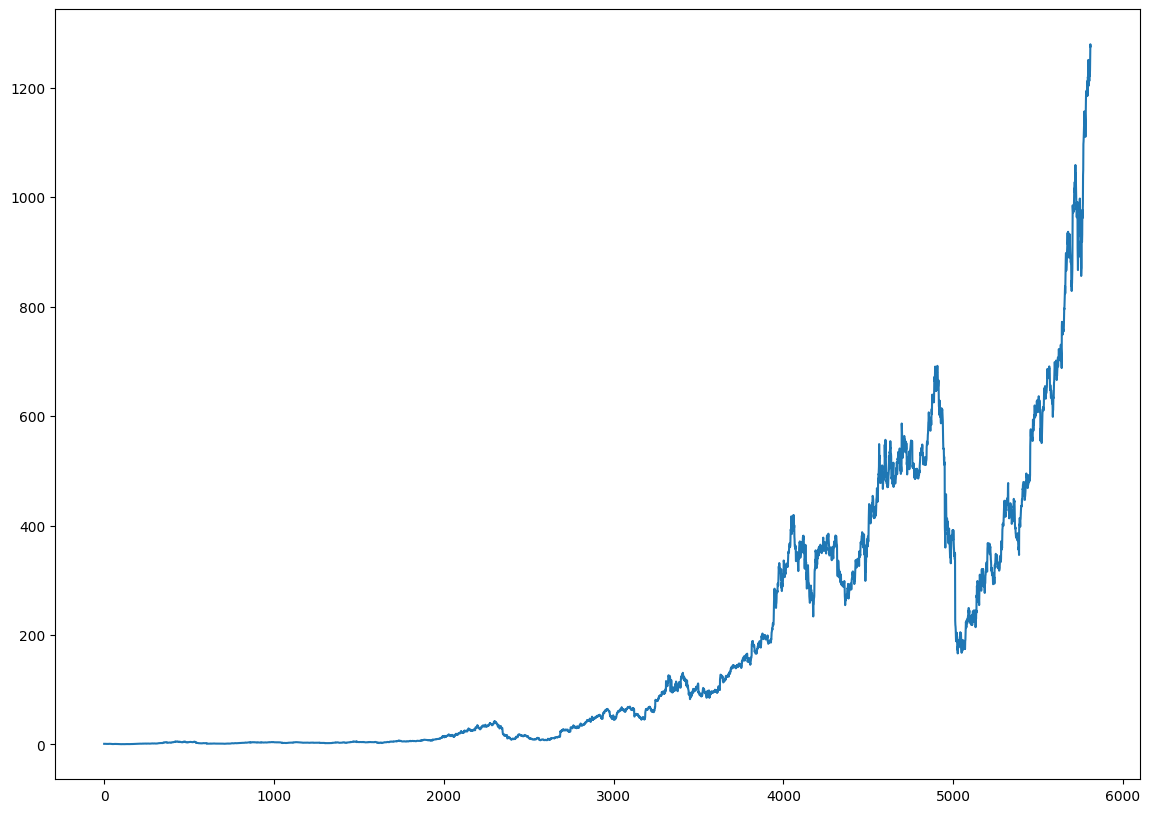

In [42]:
#plot  stock data by line Graph
plt.figure(figsize=(14,10))
data['Close'].plot()
plt.show()

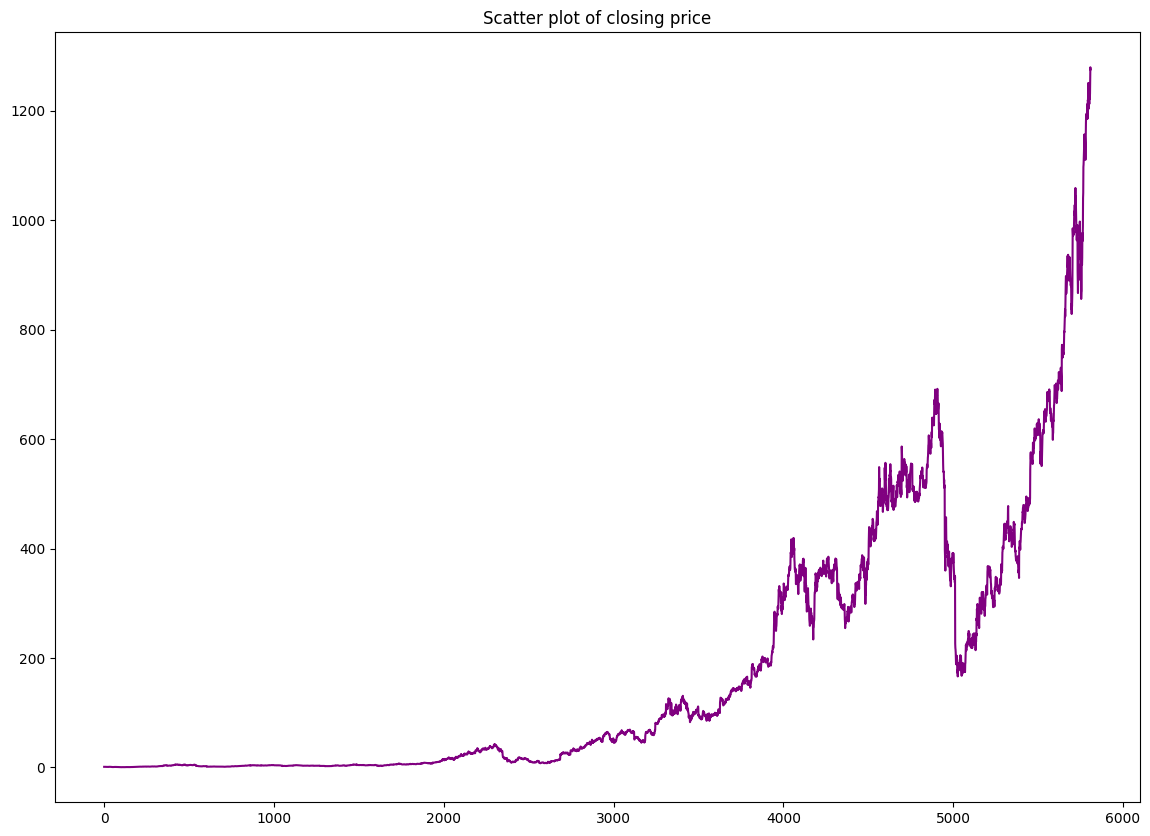

In [43]:
df_close = data['Close']
plt.figure(figsize=(14,10))
df_close.plot(style='PURPLE')
plt.title('Scatter plot of closing price')
plt.show()

create new colume of price differnce

In [45]:
data['Diff']=data['Close'].shift(-1)-data['Close']
data['Diff']

,Diff
0,0.013571
1,-0.052857
2,-0.053572
3,-0.032142
4,0.005000
...,...
5805,9.119995
5806,22.130005
5807,25.569946
5808,-3.859985


create new colume for daily return

In [46]:
data['New Column']=data['Diff']/data['Close']
data['New Column']

,New Column
0,0.011343
1,-0.043684
2,-0.046297
3,-0.029125
4,0.004667
...,...
5805,0.007461
5806,0.017971
5807,0.020398
5808,-0.003018


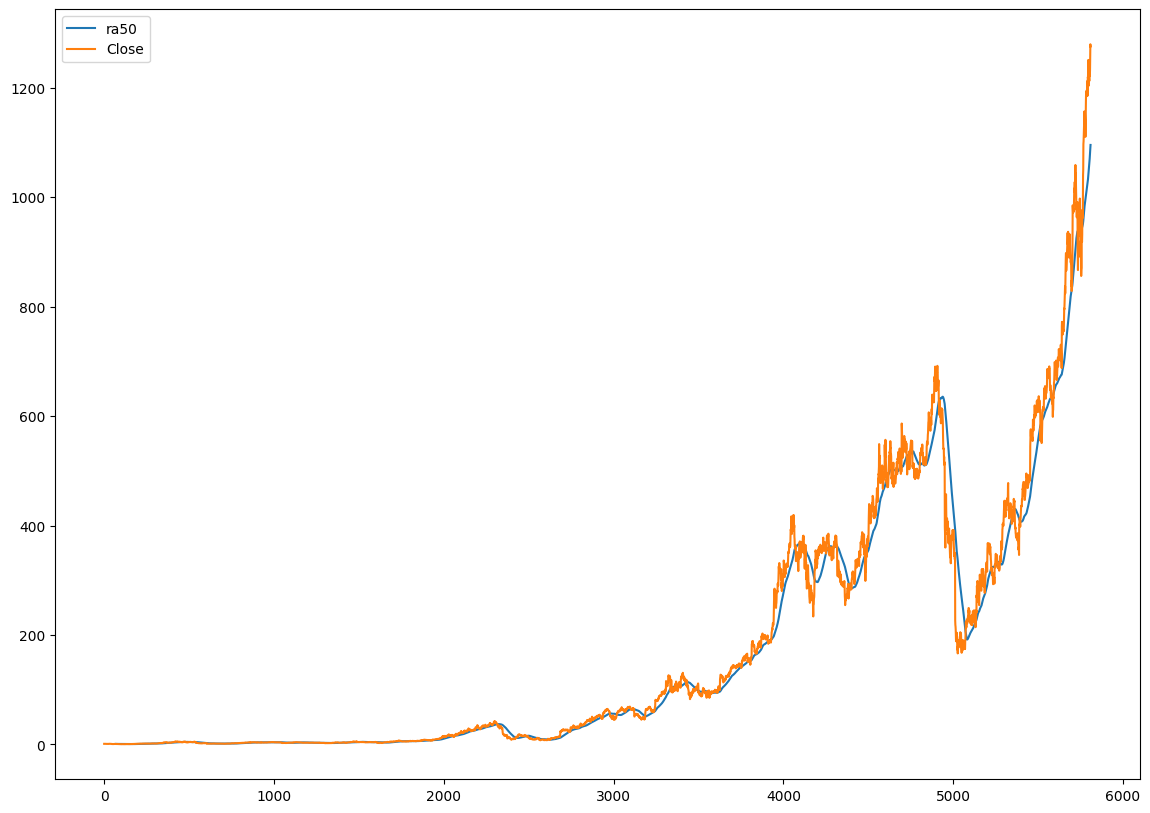

In [47]:
#here we apply rolling widow calculation for 50 days
'''In statistics, a moving average (rolling average or running average) is a calculation to analyze data points by creating a series
 of averages of different subsets of the full data set. It is also called a moving mean (MM). or rolling mean and is a type of
finite impulse response filter. Variations include: simple, cumulative, or weighted forms (described below). Highly used for financial analyses.'''
data['ra50']=data['Close'].rolling(70).mean()
plt.figure(figsize=(14,10))
data['ra50'].plot()
data['Close'].plot()
plt.legend()
plt.show()
#here we have ten year chrt of tesla stock with simple moveing average  the blue line is shorter 50 days moveing average most trader will use the cross of short term moveing averagae
#to initial a moveing average to inital a long position and identify  the start of bullish trend

In [48]:
data['ra50']=data['Close'].rolling(40).mean()
data['ra10']=data['Close'].rolling(30).mean()


In [49]:
data=data.dropna()
data

,Date,Close,High,Low,Open,Volume,price_diff,Diff,New Column,ra50,ra10
39,2002-07-19,1.160000,1.160714,1.122143,1.152857,1792000,0.010714,0.010714,0.009236,1.097821,1.084071
40,2002-07-22,1.170714,1.179286,1.115000,1.135714,1993600,-0.024285,-0.024285,-0.020744,1.097179,1.085810
41,2002-07-23,1.146429,1.213571,1.130714,1.176429,1577800,-0.032143,-0.032143,-0.028037,1.095589,1.085476
42,2002-07-24,1.114286,1.159286,1.074286,1.146429,3355800,-0.077857,-0.077857,-0.069872,1.094518,1.084167
43,2002-07-25,1.036429,1.127857,1.035000,1.125000,4755800,-0.165000,-0.165000,-0.159200,1.092839,1.082286
...,...,...,...,...,...,...,...,...,...,...,...
5804,2025-06-17,1220.670044,1232.359985,1216.089966,1219.949951,1892100,1.619995,1.619995,0.001327,1172.009247,1193.342664
5805,2025-06-18,1222.290039,1242.000000,1220.500000,1229.989990,2281000,9.119995,9.119995,0.007461,1176.557999,1196.162667
5806,2025-06-20,1231.410034,1248.500000,1224.349976,1234.449951,5348200,22.130005,22.130005,0.017971,1181.103500,1198.696000
5807,2025-06-23,1253.540039,1254.839966,1215.010010,1238.030029,2667300,25.569946,25.569946,0.020398,1185.020251,1202.333000


In [52]:
data['Shares'] = [1 if data.loc[ei, 'ra10']>data.loc[ei, 'ra50'] else 0 for ei in data.index]

/tmp/ipython-input-52-402651702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Shares'] = [1 if data.loc[ei, 'ra10']>data.loc[ei, 'ra50'] else 0 for ei in data.index]


/tmp/ipython-input-53-2426244696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close1'] = data['Close'].shift(-1)
/tmp/ipython-input-53-2426244696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Profit'] = [data.loc[ei, 'Close1'] - data.loc[ei, 'Close'] if data.loc[ei, 'Shares']==1 else 0 for ei in data.index]


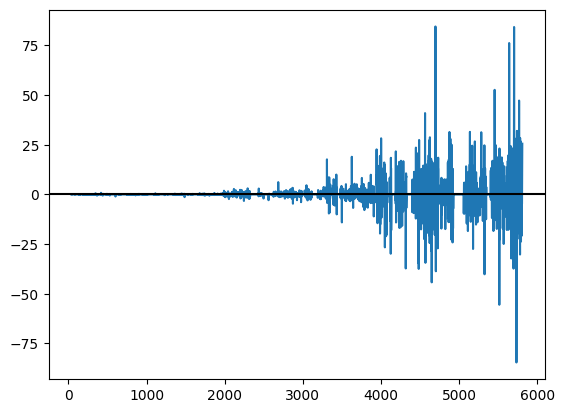

In [53]:
#calculate profit
data['Close1'] = data['Close'].shift(-1)
data['Profit'] = [data.loc[ei, 'Close1'] - data.loc[ei, 'Close'] if data.loc[ei, 'Shares']==1 else 0 for ei in data.index]
data['Profit'].plot()
plt.axhline(y=0, color='BLACK')

In [54]:
data['log_return']=np.log(data['Close'].shift(-4))-np.log(data['Close'])
data['log_return']

/tmp/ipython-input-54-4998309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_return']=np.log(data['Close'].shift(-4))-np.log(data['Close'])


,log_return
39,-0.112639
40,-0.295235
41,-0.268551
42,-0.197826
43,-0.083323
...,...
5804,0.046765
5805,NaN
5806,NaN
5807,NaN


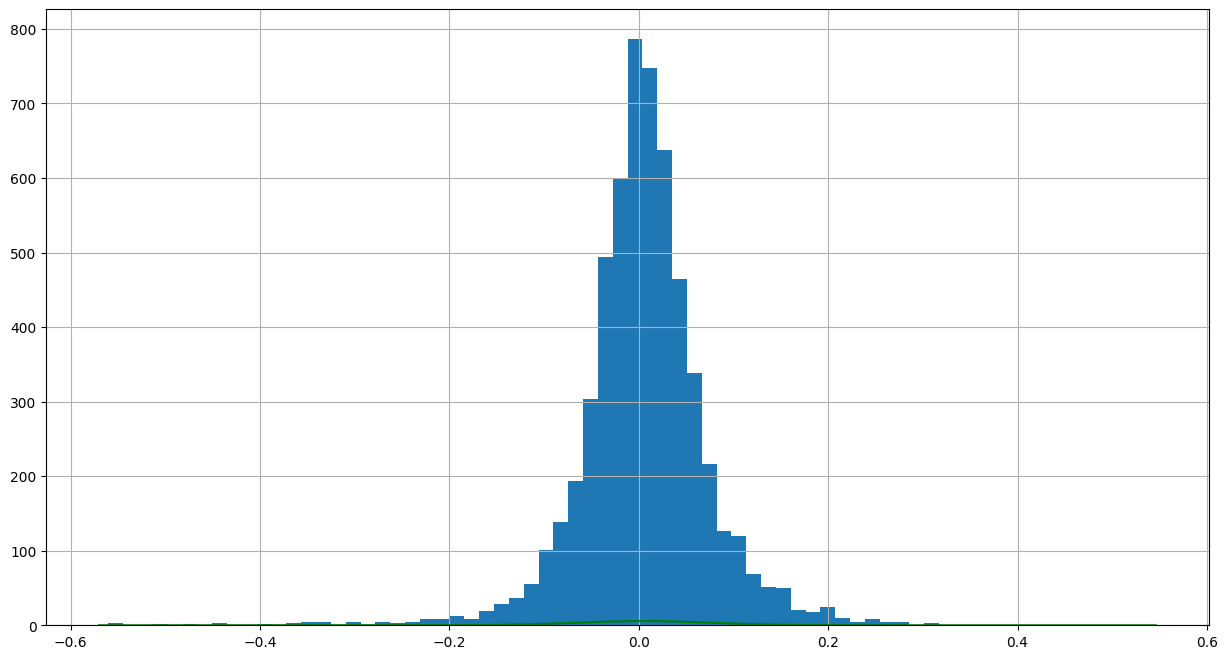

In [61]:
from scipy.stats import norm
mu = data['log_return'].mean()
sigma = data['log_return'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(data['log_return'].min()-0.01, data['log_return'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

data['log_return'].hist(bins=70, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='GREEN')
plt.show( )

In [56]:
prob_return1 = norm.cdf(-0.40, mu, sigma)
print('The probability of dropping over 10% in one day ', prob_return1)

The probability of dropping over 10% in one day  6.121189591008219e-09


In [57]:
mu220 = 365*mu
sigma220 = (365**5.6) * sigma
drop20 = None
print('The probability of dropping over 25% over a year: ', drop20)


The probability of dropping over 25% over a year:  None


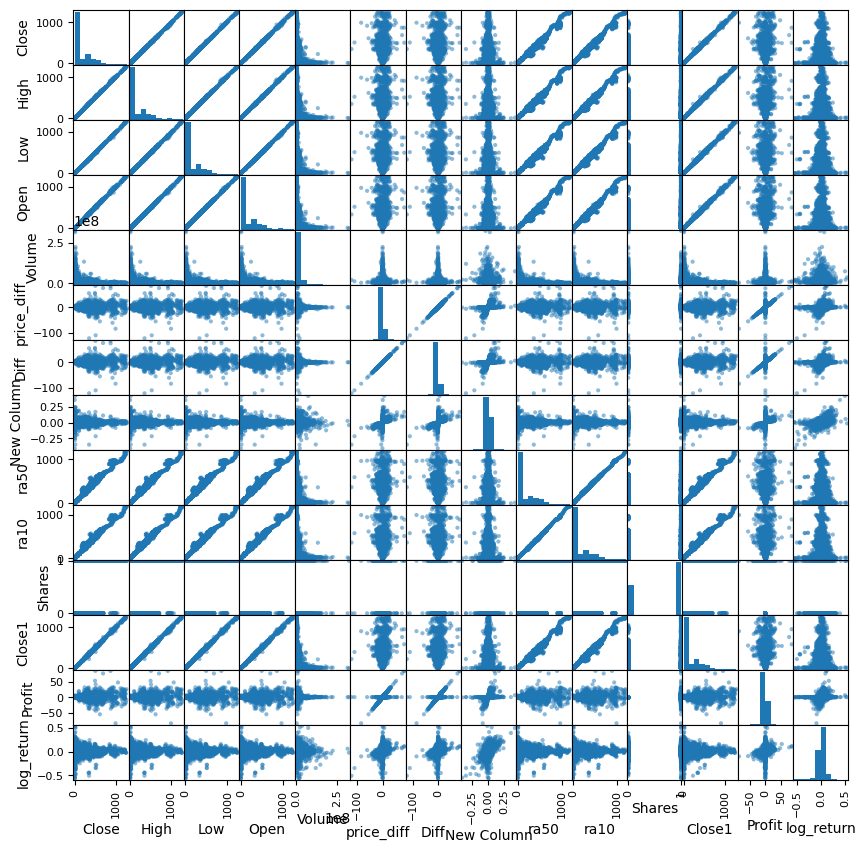

In [58]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(data, figsize=(10, 10))